<a href="https://colab.research.google.com/github/karnali/colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
# !wget -c 'https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/export?format=csv&gid?usp=sharing' -O 2019_nCoV_data.csv
# !mkdir /content/2019_nCoV_data/
# !mv 2019_nCoV_data.csv /content/2019_nCoV_data/
# !pwd
# !ls -l


In [2]:
# Reading the dataset
# https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/daily_case_updates/02-11-2020_1050.csv")
df.head(80)


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-11 14:03:05,31728,974,2310
1,Guangdong,Mainland China,2020-02-11 14:03:05,1177,1,212
2,Zhejiang,Mainland China,2020-02-11 12:53:02,1117,0,270
3,Henan,Mainland China,2020-02-11 14:03:05,1105,7,218
4,Hunan,Mainland China,2020-02-11 12:53:02,912,1,247
...,...,...,...,...,...,...
68,"Madison, WI",US,2020-02-05 21:53:02,1,0,0
69,"Orange, CA",US,2020-02-01 19:53:03,1,0,0
70,"San Diego County, CA",US,2020-02-11 01:23:05,1,0,0
71,"Seattle, WA",US,2020-02-09 07:03:04,1,0,1


In [3]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
Province/State    52 non-null object
Country/Region    73 non-null object
Last Update       73 non-null object
Confirmed         73 non-null int64
Deaths            73 non-null int64
Recovered         73 non-null int64
dtypes: int64(3), object(3)
memory usage: 3.5+ KB


In [4]:
df.describe()

,Confirmed,Deaths,Recovered
count,73.000000,73.000000,73.000000
mean,590.972603,13.945205,59.452055
std,3705.978072,113.935519,273.244652
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,18.000000,0.000000,2.000000
75%,153.000000,1.000000,28.000000
max,31728.000000,974.000000,2310.000000


In [5]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['Mainland China', 'Others', 'Hong Kong', 'Singapore', 'Thailand', 'South Korea', 'Japan', 'Malaysia', 'Taiwan', 'Vietnam', 'Germany', 'France', 'Macau', 'UK', 'United Arab Emirates', 'Australia', 'Canada', 'India', 'Italy', 'Philippines', 'Russia', 'Spain', 'US', 'Belgium', 'Cambodia', 'Finland', 'Nepal', 'Sri Lanka', 'Sweden']

Total countries affected by virus:  29


In [6]:
#Combining China and Mainland China cases
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['China', 'Others', 'Hong Kong', 'Singapore', 'Thailand', 'South Korea', 'Japan', 'Malaysia', 'Taiwan', 'Vietnam', 'Germany', 'France', 'Macau', 'UK', 'United Arab Emirates', 'Australia', 'Canada', 'India', 'Italy', 'Philippines', 'Russia', 'Spain', 'US', 'Belgium', 'Cambodia', 'Finland', 'Nepal', 'Sri Lanka', 'Sweden']

Total countries affected by virus:  29


In [7]:
# Creating a dataframe with total no of confirmed cases for every Country/Region
Number_of_countries = len(df['Country/Region'].value_counts())

cases = pd.DataFrame(df.groupby('Country/Region')['Confirmed','Deaths'].sum())
cases['Country/Region'] = cases.index

global_cases = cases[['Confirmed','Deaths']]
global_cases.sort_values(['Confirmed'], ascending=False)


,Confirmed,Deaths
Country/Region,,
China,42670,1016
Others,135,0
Hong Kong,49,1
Singapore,45,0
Thailand,32,0
South Korea,28,0
Japan,26,0
Taiwan,18,0
Malaysia,18,0


Text(0.5, 1, 'Deaths By Corona Virus')

<Figure size 1080x1440 with 0 Axes>

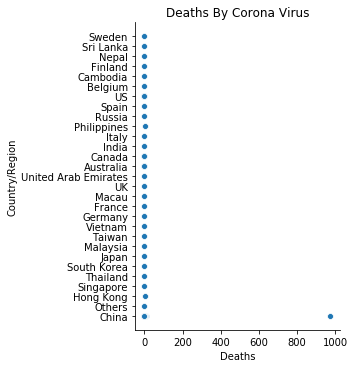

In [8]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15,20))
sns.relplot(x="Deaths", y="Country/Region", data=df)
# plt.xlim(0,700)
plt.title('Deaths By Corona Virus')